In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas_datareader as data

In [10]:
df=yf.Ticker("AAPL")

In [11]:
df=df.history(period="max")

In [12]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099192,0.099623,0.099192,0.099192,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094448,0.094448,0.094017,0.094017,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087548,0.087548,0.087116,0.087116,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089273,0.089704,0.089273,0.089273,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091861,0.092292,0.091861,0.091861,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-16 00:00:00-04:00,171.750000,173.759995,168.270004,169.380005,73711200,0.0,0.0
2024-04-17 00:00:00-04:00,169.610001,170.649994,168.000000,168.000000,50901200,0.0,0.0
2024-04-18 00:00:00-04:00,168.029999,168.639999,166.550003,167.039993,43122900,0.0,0.0


In [13]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12 00:00:00-05:00,0.099192,0.099623,0.099192,0.099192,469033600,0.0,0.0
1,1980-12-15 00:00:00-05:00,0.094448,0.094448,0.094017,0.094017,175884800,0.0,0.0
2,1980-12-16 00:00:00-05:00,0.087548,0.087548,0.087116,0.087116,105728000,0.0,0.0
3,1980-12-17 00:00:00-05:00,0.089273,0.089704,0.089273,0.089273,86441600,0.0,0.0
4,1980-12-18 00:00:00-05:00,0.091861,0.092292,0.091861,0.091861,73449600,0.0,0.0


In [14]:
df=df.drop(['Date','Dividends','Stock Splits'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,0.099192,0.099623,0.099192,0.099192,469033600
1,0.094448,0.094448,0.094017,0.094017,175884800
2,0.087548,0.087548,0.087116,0.087116,105728000
3,0.089273,0.089704,0.089273,0.089273,86441600
4,0.091861,0.092292,0.091861,0.091861,73449600


In [15]:
ma100=df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
10925    183.426199
10926    183.202228
10927    182.961966
10928    182.714687
10929    182.477606
Name: Close, Length: 10930, dtype: float64

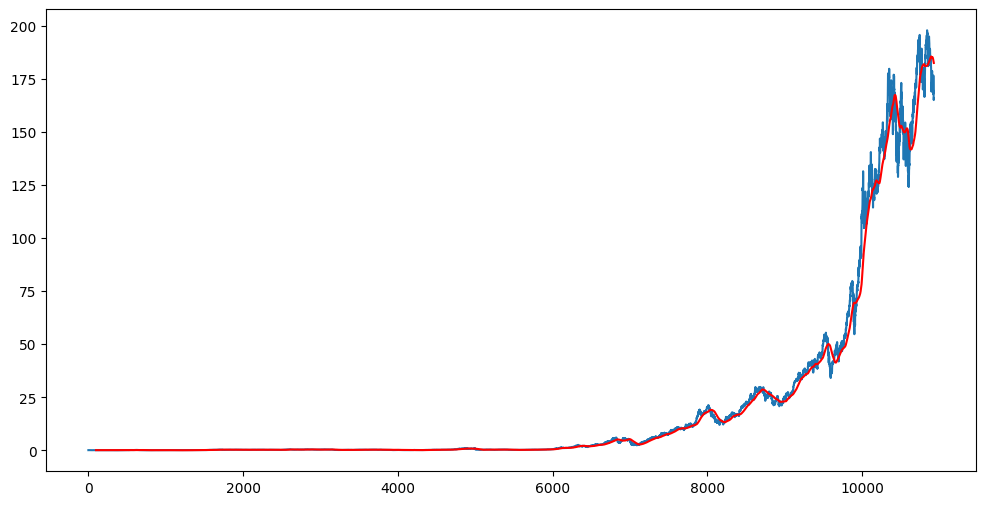

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [17]:
ma200=df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
10925    182.259237
10926    182.133202
10927    182.009887
10928    181.882000
10929    181.755923
Name: Close, Length: 10930, dtype: float64

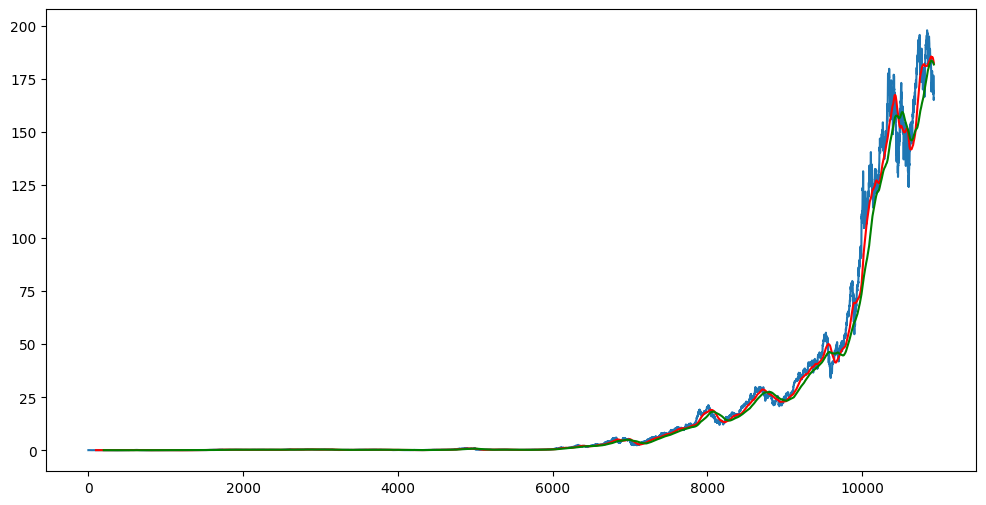

In [18]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [19]:
df.shape

(10930, 5)

In [20]:
#splitting data into traning and testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(7650, 1)
(3280, 1)


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [54]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.00559705],
       [0.00512409],
       [0.00449341],
       ...,
       [0.93301569],
       [0.93066671],
       [0.93077758]])

In [57]:
data_training_array.shape

(7650, 1)

In [58]:
x_train=[]
y_train=[]

for i in range(100,data_training.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train=np.array(x_train), np.array(y_train)

In [59]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [61]:
model = keras.Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [62]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train, epochs=50)

Epoch 1/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 34s 135ms/step - loss: 0.0365
Epoch 2/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 31s 133ms/step - loss: 0.0021
Epoch 3/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 31s 132ms/step - loss: 0.0020
Epoch 4/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 30s 129ms/step - loss: 0.0014
Epoch 5/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 31s 132ms/step - loss: 0.0014
Epoch 6/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 31s 131ms/step - loss: 0.0015
Epoch 7/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 30s 128ms/step - loss: 0.0013
Epoch 8/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 31s 130ms/step - loss: 0.0012
Epoch 9/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 31s 131ms/step - loss: 0.0014
Epoch 10/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 30s 128ms/step - loss: 0.0017
Epoch 11/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 29s 124ms/step - loss: 0.0012
Epoch 12/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 31s 129ms/step - loss: 0.0013
Epoch 13/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 29s 125ms/step - loss: 0.0014
Epoch 14/50
236/236 ━━━━━━━━━━━━━━━━━━━━ 30s 129ms/step - loss: 0.0012
Epoch 15/50
236

In [64]:
model.save('keras_model.h5')

In [65]:
data_testing.head()

,Close
7650,10.130776
7651,10.001969
7652,10.050347
7653,10.163127
7654,10.050949


In [32]:
past_100_days=data_training.tail(100)

In [33]:
import pandas as pd

final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [66]:
final_df.head()

,Close
0,9.283568
1,9.118785
2,9.085829
3,9.325597
4,9.274195


In [73]:
input_data=scaler.fit_transform(final_df)
input_data

array([[1.04750660e-03],
       [1.74581907e-04],
       [0.00000000e+00],
       ...,
       [8.36747058e-01],
       [8.25940389e-01],
       [8.30390189e-01]])

In [74]:
input_data.shape

(3380, 1)

In [75]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [76]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(3280, 100, 1)
(3280,)


In [79]:
# making predictions

y_predict=model.predict(x_test)

103/103 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step


In [80]:
y_predict

array([[0.01477079],
       [0.01476763],
       [0.01476318],
       ...,
       [0.80787164],
       [0.80775905],
       [0.80710304]], dtype=float32)

In [81]:
y_test

array([0.00553551, 0.00485317, 0.00510944, ..., 0.83674706, 0.82594039,
       0.83039019])

In [84]:
x = scaler.scale_
x

array([0.0052974])

In [85]:
scale_factor= 1/x
y_predict=y_predict*scale_factor
y_test=y_test*scale_factor

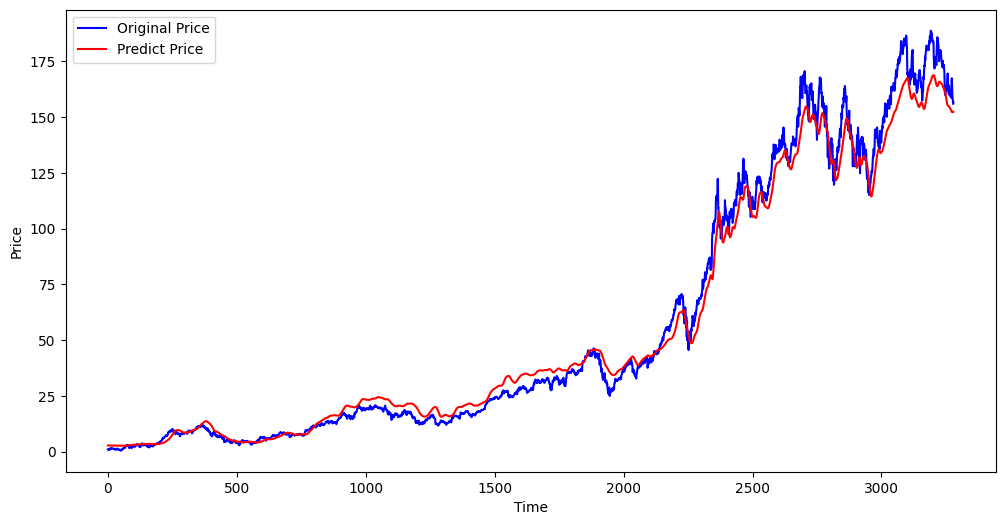

In [86]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predict,'r',label='Predict Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()